Calculate white beam intensity vs energy

In [1]:
import os, numpy as np
import histogram.hdf as hh
import mcvine, mcvine.components, mcvine.run_script

from matplotlib import pyplot as plt
%matplotlib notebook

In [14]:
from mcni.utils import conversion as C

In [2]:
workdir = os.path.expanduser("/SNS/users/lj7/dv/sns-chops/resolution/ARCS/whitebeam/")
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/whitebeam


# Create instrument sim app
Need to add a space between "AT" and "("

In [7]:
%%file arcs.instr
DEFINE INSTRUMENT ARCS() 
DECLARE
%{ 
%}
INITIALIZE
%{
%}   
TRACE

COMPONENT mod=SNS_source(S_filename="source_sct521_bu_17_1.dat",
                         width=0.1,
                         height=0.12,
                         dist=2.5,
                         xw=0.1,
                         yh=0.12,
                         Emin=Emin,
                         Emax=Emax)
AT (0,0,0) ABSOLUTE
COMPONENT core_ves=Guide_channeled(w1=0.094285,h1=0.11323,w2=0.084684,h2=0.102362,l=1.2444,
                       R0=0.0,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
                       W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,1.0106) RELATIVE mod

COMPONENT shutter_guide=Guide_channeled(w1=0.074930,h1=.094040,w2=0.070880,h2=0.086880,
                          l=1.853,
                          R0=Gu_R,mx=2.5,my=2.5,Qcx=Gu_Qc,Qcy=Gu_Qc,
                          W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,2.26790) RELATIVE mod
COMPONENT Guide_1_1_1=Guide_channeled(w1=0.07088,h1=0.08688,w2=0.07019,h2=0.08573,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,4.17230) RELATIVE mod
COMPONENT Guide_1_1_2=Guide_channeled(w1=0.07019,h1=0.08573,w2=0.06947,h2=0.08454,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,4.65589) RELATIVE mod
COMPONENT Guide_1_1_3=Guide_channeled(w1=0.06947,h1=0.08454,w2=0.06871,h2=0.08329,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,5.13948) RELATIVE mod
COMPONENT Guide_1_2_1=Guide_channeled(w1=0.06871,h1=0.08329,w2=0.06792,h2=0.08197,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,5.62331) RELATIVE mod
COMPONENT Guide_1_2_2=Guide_channeled(w1=0.06792,h1=0.08197,w2=0.06710,h2=0.08060,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,6.10690) RELATIVE mod
COMPONENT Guide_1_2_3=Guide_channeled(w1=0.06710,h1=0.08060,w2=0.06624,h2=0.07917,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,6.59049) RELATIVE mod
COMPONENT Guide_1_3_1=Guide_channeled(w1=0.06624,h1=0.07917,w2=0.06534,h2=0.07766,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,7.07433) RELATIVE mod
COMPONENT Guide_1_3_2=Guide_channeled(w1=0.06534,h1=0.07766,w2=0.06440,h2=0.07609,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,7.55792) RELATIVE mod
COMPONENT Guide_1_3_3=Guide_channeled(w1=0.06440,h1=0.07609,w2=0.06342,h2=0.07443,
						l=0.48354,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,8.04145) RELATIVE mod

/*COMPONENT T0_chopp=Arm()*/

COMPONENT t0_chopp=Vertical_T0(len=0.474,w1=0.08,w2=0.101,nu=T0_nu,delta=0.0,tc=phase_T0,
						     ymin=-0.045,ymax=0.045)
AT (0,0,LT0)RELATIVE mod

COMPONENT Guide_2_1_1=Guide_channeled(w1=0.06136,h1=0.07094,w2=0.06044,h2=0.06936,
						l=0.40204,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,9.47504) RELATIVE mod

COMPONENT Guide_2_1_2=Guide_channeled(w1=0.06044,h1=0.06936,w2=0.05948,h2=0.06771,
						l=0.40204,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,9.87713) RELATIVE mod
COMPONENT Guide_2_3_3=Guide_channeled(w1=0.05948,h1=0.06771,w2=0.05848,h2=0.06598,
						l=0.40204,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,10.27922) RELATIVE mod
COMPONENT Guide_1_3_4=Guide_channeled(w1=0.05848,h1=0.06598,w2=0.05745,h2=0.06417,
						l=0.40204,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,10.68131) RELATIVE mod
COMPONENT Guide_2_1_5=Guide_channeled(w1=0.05745,h1=0.06417,w2=0.05637,h2=0.06227,
						l=0.40204,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,11.08340) RELATIVE mod
					   
COMPONENT fermi_chopp=Fermi_chop2(len=0.10,w=0.06,ymin=-.0325,ymax=.0325,
                                        nu=Fermi_nu,delta=0.0,tc=phasefc1
                                       ,nchan=nchans,bw=0.0005,blader=nrad)
/*COMPONENT fermi_chopp=Arm()*/
AT (0,0,LF) RELATIVE mod
COMPONENT Monitor1=TOF_monitor2(xmin=-0.035,xmax=0.035,ymin=-0.035,ymax=0.035,
								tmin=tplotmin,
								tmax=tplotmax,
								nchan=100,
								filename=mon1optstr)
AT (0,0,LM1) RELATIVE mod
/* reomvable guide section that can be replaced with a collimator immediately after the the Fermichopper */
COMPONENT Guide_3_1_1=Guide_channeled(w1=0.05536,h1=0.06046,w2=0.05473,h2=0.05931,
						l=0.225,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,11.84975) RELATIVE mod
/* Section 4: fixed guide section between Fermi choppers and sample vessel */ 
COMPONENT Guide_4_1_1=Guide_channeled(w1=0.05468,h1=0.05924,w2=0.05331,h2=0.05674,
						l=0.46275,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,12.08825) RELATIVE mod

COMPONENT Guide_4_1_2=Guide_channeled(w1=0.05331,h1=0.05674,w2=0.05187,h2=0.05408,
						l=0.46275,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,12.55105) RELATIVE mod
/* Section 5 removable guide */
COMPONENT Guide_5_1_1=Guide_channeled(w1=0.05186,h1=0.05405,w2=0.05062,h2=0.05172,
						l=0.37920,
						R0=Gu_R,mx=Gu_m,my=Gu_m,Qcx=Gu_Qc,Qcy=Gu_Qc,
						W=Gu_W,k=1,d=0.0,alphax=Gu_alpha,alphay=Gu_alpha)
AT (0,0,13.01830) RELATIVE mod
/* Monitors immediately upstream of the sample position */                                            

COMPONENT E_det = E_monitor(xmin = -.025,xmax = .025,ymin = -.025,ymax = .025, 
		      Emin=Emin,Emax=Emax,
		      nchan=100,filename = detoptstr)
AT (0,0,LS-.001) RELATIVE mod 

COMPONENT Sample_Arm=Arm()
AT (0,0,LS)  RELATIVE mod

COMPONENT t_det_samp=TOF_monitor2(xmin=-0.025,xmax=0.025,ymin=-0.025,ymax=0.025,
                                tmin=(tplotmin-toffset)*LS/LM1+toffset,
								tmax=(tplotmax-toffset)*LS/LM1+toffset,
								nchan=100,
								filename=detsampoptstr)
AT (0,0,LS+0.0001) RELATIVE mod

COMPONENT t_det_det=TOF_monitor2(xmin=-0.025,xmax=0.025,ymin=-0.025,ymax=0.025,
                                tmin=(tplotmin-toffset)*(LS+L3)/LM1+toffset,
								tmax=(tplotmax-toffset)*(LS+L3)/LM1+toffset,
								nchan=100,
								filename=detdetoptstr)
AT (0,0,LS+L3) RELATIVE mod 

COMPONENT t_mon2=TOF_monitor2( xmin=-0.035,xmax=0.035,ymin=-0.035,ymax=0.035,
                              tmin=(tplotmin-toffset)*LM2/LM1+toffset,
								tmax=(tplotmax-toffset)*LM2/LM1+toffset,
							  nchan=100,
							  filename=mon2optstr)
AT (0,0,LM2) RELATIVE mod

END

Overwriting arcs.instr


In [8]:
!mcvine mcstas convertinstrument arcs.instr

Converting McStas instrument arcs.instr ...


In [9]:
more ./arcs_mcvine.py

In [15]:
ls

arcs.instr  arcs_mcvine.py


In [91]:
%%file arcs_mcvine_revised.py

import numpy as np
from numpy import power as pow, sqrt, log10, tanh
import mcvine, mcvine.components as mcomps

def instrument(Edes=None, moderator_file=None):
    from mcni.utils.conversion import SE2V
    LT0=8.77;LF=11.61;LM1=11.82;LM2=18.50;LS=13.61;L3=3.5;
    # /*determine emission time of certain energy neutrons after the prompt pulse */
    # ch_x=log10(Edes*1e-3);  
    # ch_y=-0.4420*ch_x*(1+tanh((ch_x+1.1197)/0.4042))/2-0.1235*ch_x*(1-tanh((ch_x+1.1197)/0.4042))/2-0.4189*tanh((ch_x+1.1197)/0.4042)+0.5612;
    # // toffset=0.0;
    # toffset=pow(10,ch_y)/1.0e6;
    # /*set phases for the critical lengths */
    #phasefc1=(LF)/(sqrt(Edes)*SE2V)+toffset;
    #phase_T0=(LT0)/(sqrt(Edes)*SE2V)+toffset;
    #phase_sam=(LS)/(sqrt(Edes)*SE2V)+toffset;
    #phase_det=(LS+L3)/(sqrt(Edes)*SE2V)+toffset;
    #phase_m1=(LM1)/(sqrt(Edes)*SE2V)+toffset;
    #phase_m2=(LM2)/(sqrt(Edes)*SE2V)+toffset;
    # /* set parameters for guide reflectivity profile */
    Gu_R=0.98;Gu_alpha=5.5;Gu_m=3.6;Gu_Qc=0.02;Gu_W=2e-3;
    # /* set energy range to examine  set to +/- 20% of Edes value*/
    # Emin=Edes*0.8;Emax=Edes*1.2;
    Emin = 0.; Emax = 1000.
    # //tplotw=((0.06-0.0005)/nchans-0.0005)/(4.0*PI*Fermi_nu*0.05)*4.0;
    #tplotmin=LM1/(sqrt(Emax)*SE2V)+toffset;
    #tplotmax=LM1/(sqrt(Emin)*SE2V)+toffset;

    instrument = mcvine.instrument()

    mod = mcomps.sources.SNS_source(
        name='mod', yh=0.12, dist=2.5, Emin=Emin, Emax=Emax, height=0.12, width=0.1, 
        S_filename=moderator_file, xw=0.1)
    instrument.append(mod, position=(0,0,0), orientation=(0, 0, 0))

    core_ves = mcomps.optics.Guide_channeled(name='core_ves', Qcx=Gu_Qc, R0=0.0, W=Gu_W, alphay=Gu_alpha, h2=0.102362, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.11323, l=1.2444, w2=0.084684, w1=0.094285, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(core_ves, position=(0.0, 0.0, 1.0106), orientation=(0, 0, 0), relativeTo=mod)

    shutter_guide = mcomps.optics.Guide_channeled(name='shutter_guide', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.086880, alphax=Gu_alpha, Qcy=Gu_Qc, h1=.094040, l=1.853, w2=0.070880, w1=0.074930, k=1, my=2.5, mx=2.5, d=0.0)
    instrument.append(shutter_guide, position=(0.0, 0.0, 2.2679), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_1_1 = mcomps.optics.Guide_channeled(name='Guide_1_1_1', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.08573, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.08688, l=0.48354, w2=0.07019, w1=0.07088, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_1_1, position=(0.0, 0.0, 4.1723), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_1_2 = mcomps.optics.Guide_channeled(name='Guide_1_1_2', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.08454, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.08573, l=0.48354, w2=0.06947, w1=0.07019, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_1_2, position=(0.0, 0.0, 4.65589), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_1_3 = mcomps.optics.Guide_channeled(name='Guide_1_1_3', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.08329, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.08454, l=0.48354, w2=0.06871, w1=0.06947, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_1_3, position=(0.0, 0.0, 5.13948), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_2_1 = mcomps.optics.Guide_channeled(name='Guide_1_2_1', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.08197, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.08329, l=0.48354, w2=0.06792, w1=0.06871, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_2_1, position=(0.0, 0.0, 5.62331), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_2_2 = mcomps.optics.Guide_channeled(name='Guide_1_2_2', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.08060, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.08197, l=0.48354, w2=0.06710, w1=0.06792, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_2_2, position=(0.0, 0.0, 6.1069), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_2_3 = mcomps.optics.Guide_channeled(name='Guide_1_2_3', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.07917, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.08060, l=0.48354, w2=0.06624, w1=0.06710, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_2_3, position=(0.0, 0.0, 6.59049), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_3_1 = mcomps.optics.Guide_channeled(name='Guide_1_3_1', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.07766, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.07917, l=0.48354, w2=0.06534, w1=0.06624, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_3_1, position=(0.0, 0.0, 7.07433), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_3_2 = mcomps.optics.Guide_channeled(name='Guide_1_3_2', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.07609, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.07766, l=0.48354, w2=0.06440, w1=0.06534, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_3_2, position=(0.0, 0.0, 7.55792), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_3_3 = mcomps.optics.Guide_channeled(name='Guide_1_3_3', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.07443, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.07609, l=0.48354, w2=0.06342, w1=0.06440, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_3_3, position=(0.0, 0.0, 8.04145), orientation=(0, 0, 0), relativeTo=mod)

    #t0_chopp = mcomps.optics.Vertical_T0(name='t0_chopp', ymax=0.045, len=0.474, tc=phase_T0, w2=0.101, w1=0.08, delta=0.0, ymin=-0.045, nu=T0_nu)
    #instrument.append(t0_chopp, position=None, orientation=(0, 0, 0))

    Guide_2_1_1 = mcomps.optics.Guide_channeled(name='Guide_2_1_1', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.06936, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.07094, l=0.40204, w2=0.06044, w1=0.06136, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_2_1_1, position=(0.0, 0.0, 9.47504), orientation=(0, 0, 0), relativeTo=mod)

    Guide_2_1_2 = mcomps.optics.Guide_channeled(name='Guide_2_1_2', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.06771, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.06936, l=0.40204, w2=0.05948, w1=0.06044, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_2_1_2, position=(0.0, 0.0, 9.87713), orientation=(0, 0, 0), relativeTo=mod)

    Guide_2_3_3 = mcomps.optics.Guide_channeled(name='Guide_2_3_3', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.06598, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.06771, l=0.40204, w2=0.05848, w1=0.05948, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_2_3_3, position=(0.0, 0.0, 10.27922), orientation=(0, 0, 0), relativeTo=mod)

    Guide_1_3_4 = mcomps.optics.Guide_channeled(name='Guide_1_3_4', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.06417, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.06598, l=0.40204, w2=0.05745, w1=0.05848, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_1_3_4, position=(0.0, 0.0, 10.68131), orientation=(0, 0, 0), relativeTo=mod)

    Guide_2_1_5 = mcomps.optics.Guide_channeled(name='Guide_2_1_5', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.06227, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.06417, l=0.40204, w2=0.05637, w1=0.05745, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_2_1_5, position=(0.0, 0.0, 11.0834), orientation=(0, 0, 0), relativeTo=mod)

    # fermi_chopp = mcomps.optics.Fermi_chop2(name='fermi_chopp', nchan=nchans, ymax=.0325, len=0.10, tc=phasefc1, bw=0.0005, w=0.06, delta=0.0, ymin=-.0325, nu=Fermi_nu, blader=nrad)
    # instrument.append(fermi_chopp, position=(0.0, 0.0, 'LF'), orientation=(0, 0, 0), relativeTo=mod)

    atFC = mcomps.monitors.NeutronToStorage(name='atFC', path='neutrons_at_FC')
    instrument.append(atFC, position=(0.0, 0.0, LF), orientation=(0, 0, 0), relativeTo=mod)

    Guide_3_1_1 = mcomps.optics.Guide_channeled(name='Guide_3_1_1', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.05931, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.06046, l=0.225, w2=0.05473, w1=0.05536, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_3_1_1, position=(0.0, 0.0, 11.84975), orientation=(0, 0, 0), relativeTo=mod)

    Guide_4_1_1 = mcomps.optics.Guide_channeled(name='Guide_4_1_1', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.05674, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.05924, l=0.46275, w2=0.05331, w1=0.05468, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_4_1_1, position=(0.0, 0.0, 12.08825), orientation=(0, 0, 0), relativeTo=mod)

    Guide_4_1_2 = mcomps.optics.Guide_channeled(name='Guide_4_1_2', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.05408, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.05674, l=0.46275, w2=0.05187, w1=0.05331, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_4_1_2, position=(0.0, 0.0, 12.55105), orientation=(0, 0, 0), relativeTo=mod)

    Guide_5_1_1 = mcomps.optics.Guide_channeled(name='Guide_5_1_1', Qcx=Gu_Qc, R0=Gu_R, W=Gu_W, alphay=Gu_alpha, h2=0.05172, alphax=Gu_alpha, Qcy=Gu_Qc, h1=0.05405, l=0.37920, w2=0.05062, w1=0.05186, k=1, my=Gu_m, mx=Gu_m, d=0.0)
    instrument.append(Guide_5_1_1, position=(0.0, 0.0, 13.0183), orientation=(0, 0, 0), relativeTo=mod)

    atsample = mcomps.monitors.NeutronToStorage(name='save', path='neutrons_at_sample')
    instrument.append(atsample, position=(0.0, 0.0, LS), orientation=(0, 0, 0), relativeTo=mod)

    return instrument

Overwriting arcs_mcvine_revised.py


# Run sim

In [37]:
%%file params.yaml
moderator_file: /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat

Writing params.yaml


In [44]:
!python -m "mcvine.run_script" arcs_mcvine_revised.py --help

Usage: run_script.py [OPTIONS] SCRIPT

Options:
  --workdir TEXT           work directory
  --ncount INTEGER         neutron count
  --overwrite_datafiles    overwrite datafiles
  --buffer_size INTEGER    neutron buffer size
  --mpi-mode TEXT
  --nodes INTEGER
  --run-pps                run post-processing script. only valid for None mpi
                           mode
  --additional-kargs TEXT  addiontal kwd args in a yaml file
  --help                   Show this message and exit.


In [54]:
# rm -rf n1e6

In [12]:
%%time
ncount = "1e8"
!python -m "mcvine.run_script" arcs_mcvine_revised.py \
    --workdir {ncount} --overwrite_datafiles \
    --ncount {int(float(ncount))} --mpi-mode server --nodes 20\
    --run-pps \
    --additional-kargs params.yaml

Loading moderator file /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
Loading moderator file /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
Loading moderator file /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
Loading moderator file /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
/SNS/software/miniconda2/envs/mcvine-unstable/share/mc

Loading moderator file /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/resources/instruments/ARCS/moderator/source_sct521_bu_17_1.dat
total vals: 12690
idx3 = 1
totalvals = 12690
Ecoltmp[0] = 1e-05
tcoltmp[0] = 0
Start calculating probability distribution
0 
nEvals = 140, ntvals = 90
Finished calculating probability distribution
finalize component "mod"
finalize component "core_ves"
finalize component "shutter_guide"
finalize component "Guide_1_1_1"
finalize component "Guide_1_1_2"
finalize component "Guide_1_1_3"
finalize component "Guide_1_2_1"
finalize component "Guide_1_2_2"
finalize component "Guide_1_2_3"
finalize component "Guide_1_3_1"
finalize component "Guide_1_3_2"
finalize component "Guide_1_3_3"
finalize component "Guide_2_1_1"
finalize component "Guide_2_1_2"
finalize component "Guide_2_3_3"
finalize component "Guide_1_3_4"
finalize componen

finalize component "mod"
finalize component "core_ves"
finalize component "shutter_guide"
finalize component "Guide_1_1_1"
finalize component "Guide_1_1_2"
finalize component "Guide_1_1_3"
finalize component "Guide_1_2_1"
finalize component "Guide_1_2_2"
finalize component "Guide_1_2_3"
finalize component "Guide_1_3_1"
finalize component "Guide_1_3_2"
finalize component "Guide_1_3_3"
finalize component "Guide_2_1_1"
finalize component "Guide_2_1_2"
finalize component "Guide_2_3_3"
finalize component "Guide_1_3_4"
finalize component "Guide_2_1_5"
finalize component "Monitor1"
finalize component "Guide_3_1_1"
finalize component "Guide_4_1_1"
finalize component "Guide_4_1_2"
finalize component "Guide_5_1_1"
finalize component "mod"
finalize component "core_ves"
finalize component "shutter_guide"
finalize component "Guide_1_1_1"
finalize component "Guide_1_1_2"
finalize component "Guide_1_1_3"
finalize component "Guide_1_2_1"
finalize component "Guide_1_2_2"
finalize component "Guide_1_2_3

In [92]:
# ls -tl 1e8/  |head -n 10

# Analyze

In [17]:
import mcni.neutron_storage as mns

In [18]:
atsample = mns.readneutrons_asnpyarr('./1e8/neutrons_at_sample')

In [19]:
atsample.shape

(3626408, 10)

In [20]:
atsample[0]

array([ -1.51035964e-02,   9.90290769e-03,  -5.91700000e-01,
        -2.26081749e+01,   3.18496608e+01,   1.73770980e+03,
         0.00000000e+00,   0.00000000e+00,   7.50811744e-03,
         1.02073976e-01])

In [37]:
atsample.shape

(3626408, 10)

In [93]:
# velocity vectors
vvs = atsample[:, 3:6]
# probability array. normalized
ps = atsample[:, -1] / atsample.shape[0]

In [94]:
vs = np.linalg.norm(vvs, axis=-1)

In [98]:
es = C.v2e(vs)

## I(E)

In [99]:
I, Ebb = np.histogram(es, weights=ps, bins=10000)
Ecenters = (Ebb[1:] + Ebb[:-1])/2

In [100]:
Ebb[1]-Ebb[0]

0.099993288359785382

<IPython.core.display.Javascript object>


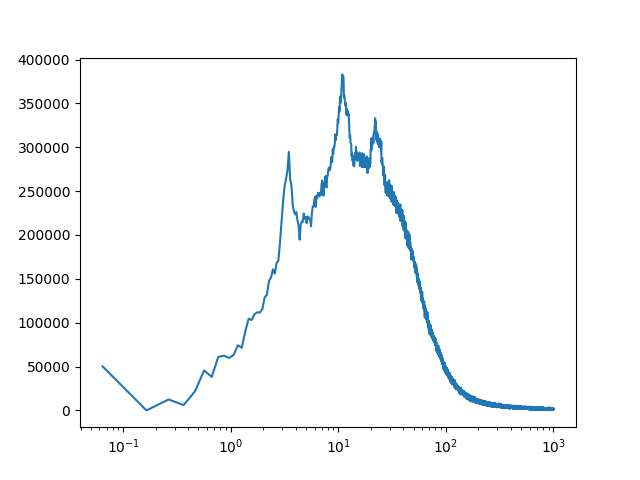

In [101]:
plt.figure()
plt.semilogx(Ecenters, I)

# I(dtof)

In [126]:
tofs = atsample[:, -2]
zs = atsample[:, 2]
vz = atsample[:, 5]

In [127]:
LS=13.61
dtof = tofs - (LS+zs)/vz

In [128]:
I, tbb = np.histogram(dtof, weights=ps, bins=1000)
tcenters = (tbb[1:] + tbb[:-1])/2

<IPython.core.display.Javascript object>


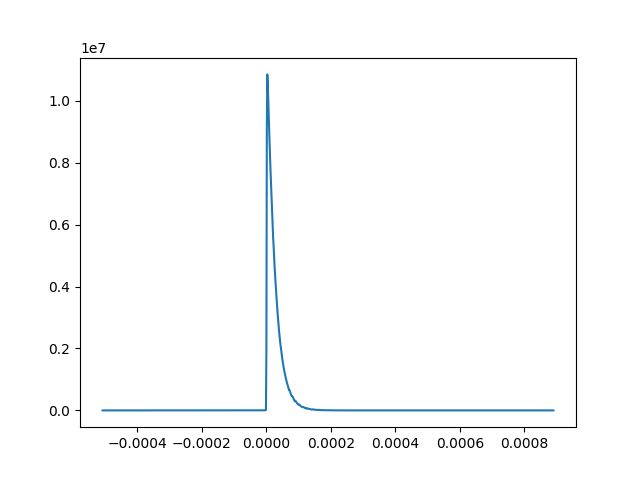

In [129]:
plt.figure()
plt.plot(tcenters, I)

# I(dtof) at E=100

In [130]:
condition = np.logical_and(es<100.2, es>99.8)

In [131]:
condition.sum()

3263

In [140]:
I, tbb = np.histogram(dtof[condition]*1e6, weights=ps[condition], bins=np.arange(-10, 120, 2.))
tcenters = (tbb[1:] + tbb[:-1])/2

<IPython.core.display.Javascript object>


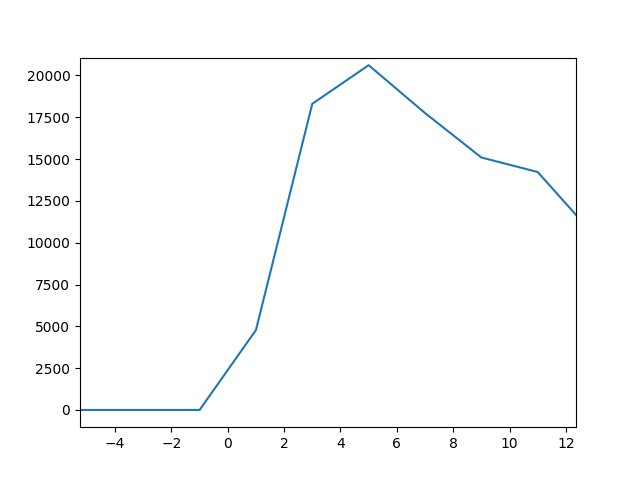

In [141]:
plt.figure()
plt.plot(tcenters, I)

## Check with toffset calculation

In [118]:
from numpy import power as pow, sqrt, log10, tanh
from mcni.utils.conversion import SE2V

In [120]:
Edes = 100.

In [121]:
LT0=8.77;LF=11.61;LM1=11.82;LM2=18.50;LS=13.61;L3=3.5;
ch_x=log10(Edes*1e-3);  
ch_y=-0.4420*ch_x*(1+tanh((ch_x+1.1197)/0.4042))/2-0.1235*ch_x*(1-tanh((ch_x+1.1197)/0.4042))/2-0.4189*tanh((ch_x+1.1197)/0.4042)+0.5612;
# // toffset=0.0;
toffset=pow(10,ch_y)/1.0e6;
# /*set phases for the critical lengths */
phasefc1=(LF)/(sqrt(Edes)*SE2V)+toffset;
phase_T0=(LT0)/(sqrt(Edes)*SE2V)+toffset;
phase_sam=(LS)/(sqrt(Edes)*SE2V)+toffset;
phase_det=(LS+L3)/(sqrt(Edes)*SE2V)+toffset;
phase_m1=(LM1)/(sqrt(Edes)*SE2V)+toffset;
phase_m2=(LM2)/(sqrt(Edes)*SE2V)+toffset;

In [124]:
toffset*1e6

5.8779891261763559

## Compute intensity after FC manually

See Toby Perring thesis page 106

$\Delta T = \frac{p}{2R\omega}$


In [143]:
p = 1.52 #mm
R = 50.
nu = 600.
omega = 2*np.pi*nu
dT = p/2/R/omega
print dT

4.03192522499e-06


* $\Delta T = 4$ microseconds
* Intensity above is roughly 20k counts per 2 microsecond per .4 meV per pulse
* FHWM of energy peak is 4meV
* Roughly intensity would be 20kX2X10=400k counts per pulse
* This does not account for $f(\gamma)$ and $\frac{p}{d}$ term yet

compare with mcvine sim results with Fermi chopper

In [148]:
mcvine_mono_data = np.loadtxt('../mcvine-FWHM-counts.dat')

In [153]:
Ei, freq, FWHM, counts = mcvine_mono_data.T

In [156]:
print freq[np.isclose(Ei, 100.)]
print counts[np.isclose(Ei, 100.)]

[  60.  120.  180.  240.  300.  360.  420.  480.  540.  600.]
[  63961.21413011   98102.07654687  134147.37302478  164560.23578682
  188867.82072949  212993.24833353  226576.66082103  231629.81636715
  223500.64226197  207035.20066076]


It is 200k for 600Hz. Compare this to 400k calculated above. Not bad for a quick calculation. Remember we did not calculate $f(\gamma)$ and $\frac{p}{d}$

## Compare to experiment

* From https://jupyter.sns.gov/user/lj7/notebooks/dv/sns-chops/resolution/ARCS/Inspect%20108184.ipynb, it is 156 counts per pulse
* 3cm tall, 3cm diameter, 1mm thickness vanadium, 18 mg mass?

In [163]:
cm = 1e-2; AA = 1e-10

In [168]:
barn = 1e-24 *cm*cm

In [169]:
sigma = 5.1 * barn

In [170]:
density = 2/ (3.03*AA)**3

In [171]:
scattering_length = 1./density/sigma
print scattering_length

0.0272726735294


In [174]:
scattering_fraction = 1e-3/scattering_length
print scattering_fraction

0.0366667389217


In [177]:
power_ratio = 1.4/2

In [178]:
print 200*1e3 * power_ratio * scattering_fraction * (2.5/4/np.pi) * (3.*3/5/5) 

367.648643026


2 X difference ?

other factors not counted
* detector efficiency

I would say it is pretty close

check sample 

In [157]:
rho = 5.8 # g/cm^3
vol = 2*np.pi*(3./2)*0.1*3
print vol*rho

16.3991136517


# I(E) at optimal dtof. unit: counts per pulse per microsecond per meV for 5X5cm^2 

In [179]:
dtof.shape

(3626408,)

In [182]:
I, Ebb, tbb = np.histogram2d(es, dtof*1e6, bins=(np.arange(0, 3000., 1.), np.arange(-50, 500., 1.)), weights=ps)

In [183]:
I.shape

(2999, 549)

In [184]:
Ecenters = (Ebb[1:] + Ebb[:-1])/2

In [185]:
optimalI = [np.max(I[i]) for i in range(2999)]

<IPython.core.display.Javascript object>


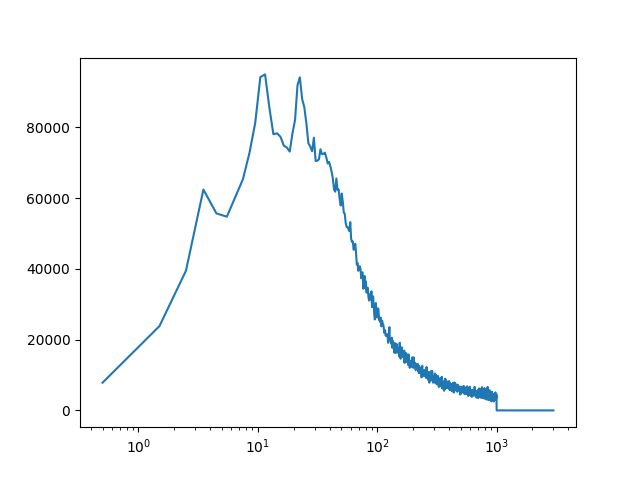

In [187]:
plt.figure()
plt.semilogx(Ecenters, optimalI)

In [188]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

<IPython.core.display.Javascript object>


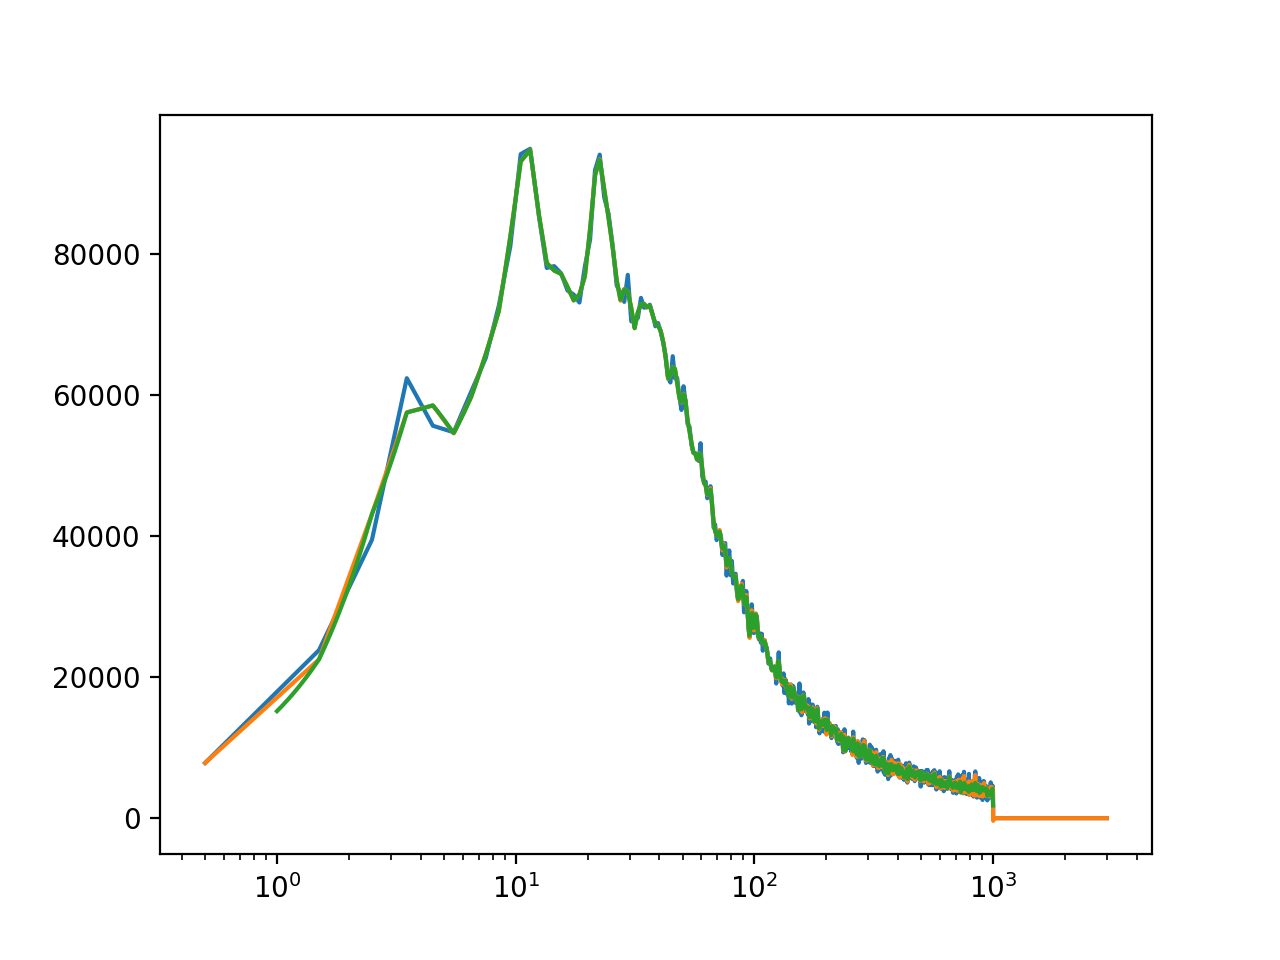

In [202]:
plt.figure()
plt.semilogx(Ecenters, optimalI)
ysg = savitzky_golay(optimalI, window_size=7, order=4)
plt.semilogx(Ecenters, ysg)

# Output

In [212]:
logE = np.logspace(0, 3, 100)

In [213]:
logI = np.interp(logE, Ecenters, ysg)

<IPython.core.display.Javascript object>


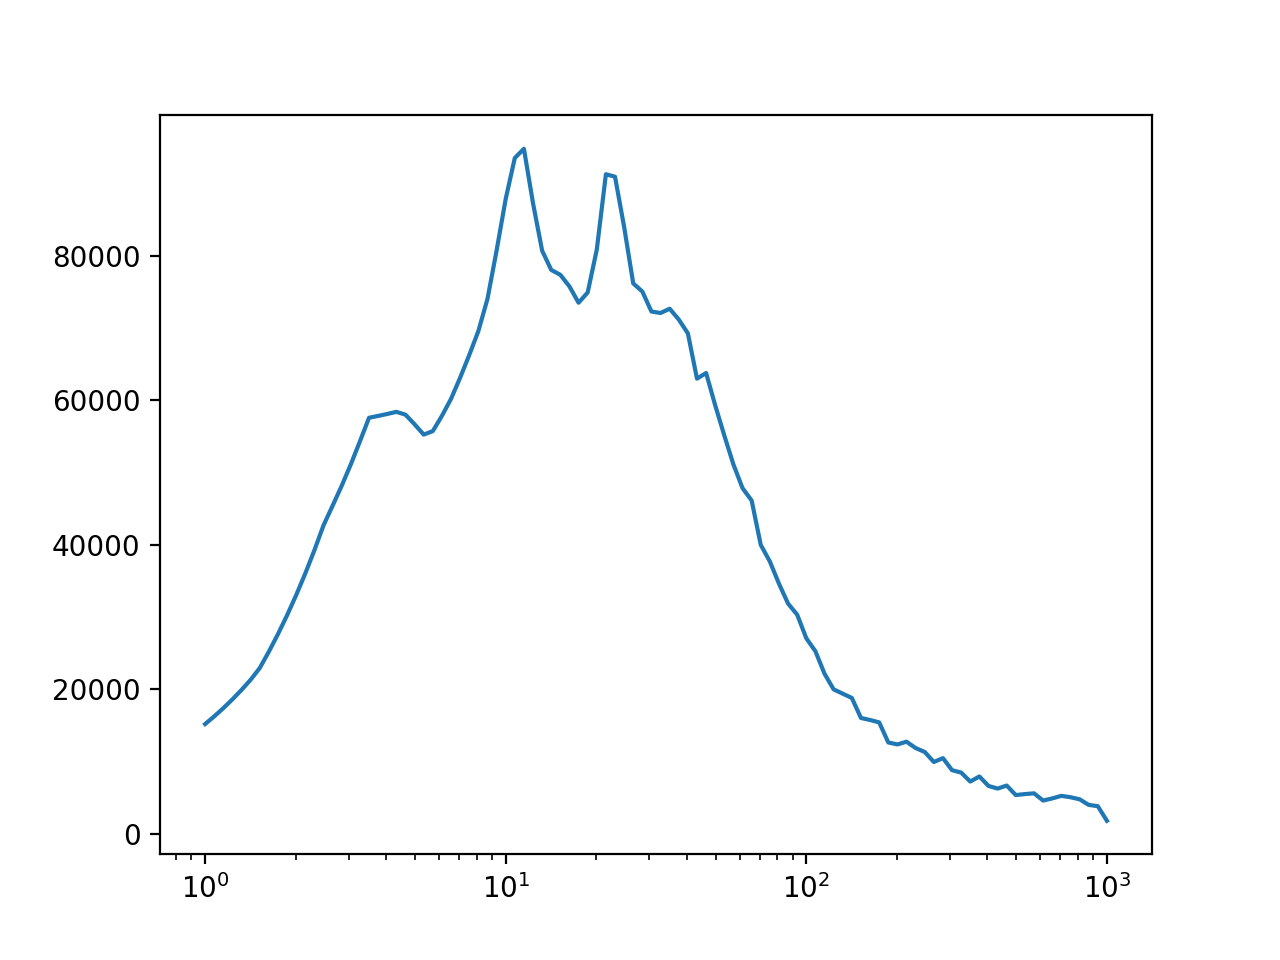

In [214]:
plt.figure()
plt.semilogx(logE, logI)

In [215]:
wavelen = 2*np.pi/C.e2k(logE)

In [216]:
print list(wavelen[::-1])
print list(logI[::-1])

[0.28601414576833351, 0.29616861080662232, 0.30668359353866664, 0.31757189355627352, 0.32884676487984915, 0.34052193209214343, 0.35261160704479783, 0.36513050615803061, 0.37809386833452097, 0.39151747350929472, 0.40541766185819367, 0.41981135368831168, 0.43471607003460611, 0.45014995398775937, 0.46613179277925221, 0.48268104065052947, 0.49981784253410028, 0.5175630585753952, 0.53593828952523304, 0.55496590303380511, 0.57466906087818581, 0.59507174715650868, 0.61619879748313355, 0.63807592922033896, 0.66072977278334122, 0.68418790405674834, 0.70847887796190545, 0.73363226321599551, 0.75967867832520353, 0.78664982885576173, 0.81457854602823976, 0.84349882668206377, 0.87344587465890866, 0.90445614365534355, 0.93656738159688513, 0.969818676587485, 1.0042505044903745, 1.0399047781981905, 1.0768248986523594, 1.1150558076738351, 1.1546440426695133, 1.1956377932809006, 1.2380869600440081, 1.2820432151318641, 1.3275600652535944, 1.3746929167866273, 1.4234991432213153, 1.4740381550000654, 1.5263

# Old results

## Rebin

In [39]:
fineE = IE.energy
fineI = IE.I
fineE.shape = fineI.shape = 100, 100
newE = np.mean(fineE, -1)
newI = np.mean(fineI, -1)

<IPython.core.display.Javascript object>


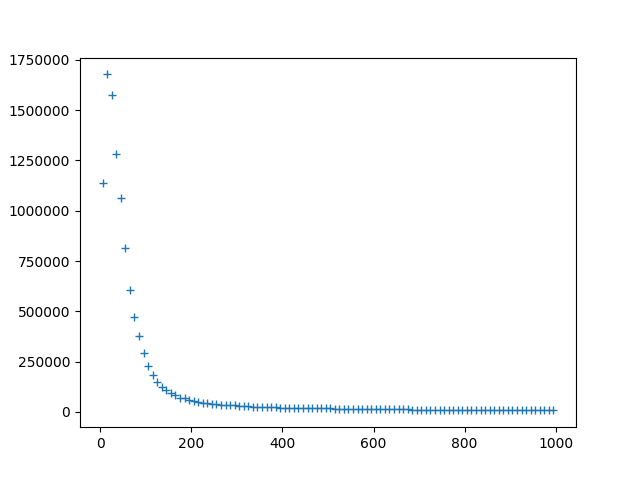

In [40]:
plt.figure()
plt.plot(newE, newI, '+')

In [41]:
logE = np.logspace(0, 3, 100)

In [42]:
logI = np.interp(logE, newE, newI)

<IPython.core.display.Javascript object>


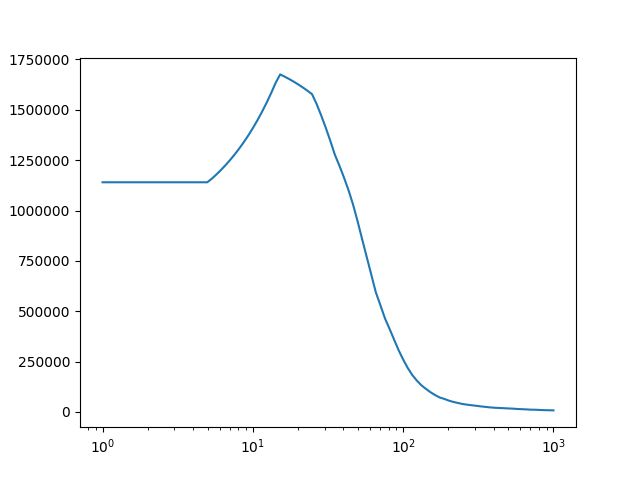

In [43]:
plt.figure()
plt.semilogx(logE, logI)

In [31]:
wavelen = 2*np.pi/C.e2k(logE)

In [44]:
print list(wavelen[::-1])
print list(logI[::-1])

[0.28601414576833351, 0.29616861080662232, 0.30668359353866664, 0.31757189355627352, 0.32884676487984915, 0.34052193209214343, 0.35261160704479783, 0.36513050615803061, 0.37809386833452097, 0.39151747350929472, 0.40541766185819367, 0.41981135368831168, 0.43471607003460611, 0.45014995398775937, 0.46613179277925221, 0.48268104065052947, 0.49981784253410028, 0.5175630585753952, 0.53593828952523304, 0.55496590303380511, 0.57466906087818581, 0.59507174715650868, 0.61619879748313355, 0.63807592922033896, 0.66072977278334122, 0.68418790405674834, 0.70847887796190545, 0.73363226321599551, 0.75967867832520353, 0.78664982885576173, 0.81457854602823976, 0.84349882668206377, 0.87344587465890866, 0.90445614365534355, 0.93656738159688513, 0.969818676587485, 1.0042505044903745, 1.0399047781981905, 1.0768248986523594, 1.1150558076738351, 1.1546440426695133, 1.1956377932809006, 1.2380869600440081, 1.2820432151318641, 1.3275600652535944, 1.3746929167866273, 1.4234991432213153, 1.4740381550000654, 1.5263